Trình bày hiểu biết của em về Kmean. Nêu hai phương pháp lựa chọn số cụm tối ưu.

<b>Mục tiêu của Kmean là nhóm các mẫu giống nhau thành các cụm (cluster). Dùng cho các trường hợp phân tích dữ liệu, phân nhóm, để xuất, tìm kiếm, phân vùng ảnh, học bán giám sát, giảm chiều và nhiều tác vụ khác</b>\
Trong phân cụm Kmean ta không biết nhãn của từng điểm dữ liệu. Mục đích là làm thế nào để phân dữ liệu thành các cụm (cluster) khác nhau sao cho dữ liệu trong một cụm có những tính chất giống nhau

Một nhóm/cụm có thể được định nghĩa là tập hợp các điểm có vactor đặc trưng gần nhau. Việc tính toán khoảng cách có thể phụ thuộc vào từng loại dữ liệu trong đó khoảng cách Eculid được sử dụng phổ biến nhất

<center><b>Tóm tắt thuật toán</b></center>

<b>Đầu vào:</b> Dữ liệu <b>X</b> và số lượng cluster cần tìm <b>K</b>\
<b>Đầu ra:</b> Các center <b>M</b> và label vector cho từng điểm dữ liệu 
   1. Chọn <b>K</b> điểm bất kỳ làm các center ban đầu
   2. Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất
   3. Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp
       trước nó thì ta dừng thuật toán
   4. Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất cả các
       điểm dữ liệu đã được gán vào cluster sau bước 2
   5. Quay lại bước 2

<b>Hai phương pháp lựa chọn số cụm tốt nhất</b>

<b>1. Phương pháp elbow (Khuỷu)</b>\
    Vẽ đồ thị inertia dưới dạng hàm số của k, khi biểu diễn inertia như một hàm số của\
    số cụm k, đường cong thường chưa một điểm uống được gọi là khuỷu
    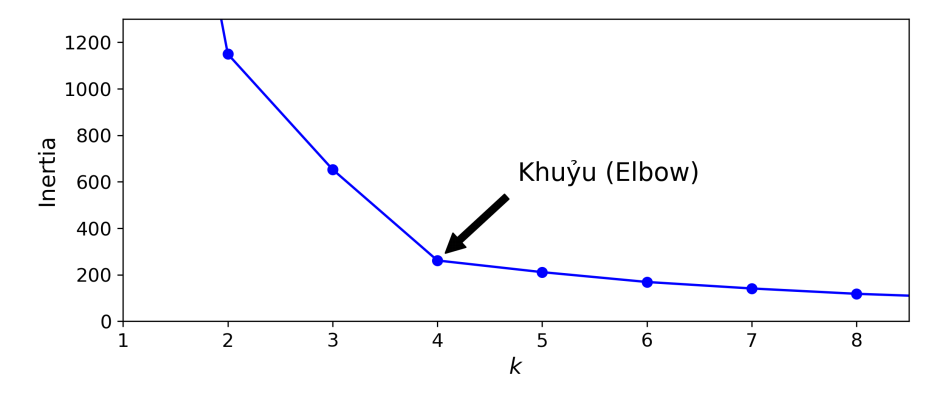\
    Như trong hình trên, inertia giảm rất nhanh khi ta tăng k đến 4, nhưng sau đó nó giảm chậm\
    hơn rất nhiều khi k tiếp tục tặng. Đường cong này giống như hình dạng cánh tay, và\
    tại điểm k = 4 giống như một "Khuỷu tay". Vì thế nếu không có thêm thông tin, 4 có\
    thể là sự lựa chọn tốt 
    
<b>2. Phương pháp sử dụng điểm số silhouette</b>\
    Ta có thể biểu diễn hệ số silhouette của từng mẫu, sắp xếp theo cụm mà chúng được gán giá trị\
    của hệ số đó. Đồ thị này được gọi là đồ thị silhouette. Mỗi đồ thị có hình dạng lưỡi dao tương\
    ứng với một cụm. Chiều cao của lưỡi dao biểu diễn số mẫu trong cụm, trong khi chiều rộng biểu\
    diễn hệ số silhouette của các mẫu. Đường nét đứt biểu hiện hệ số silhoutte trung bình
    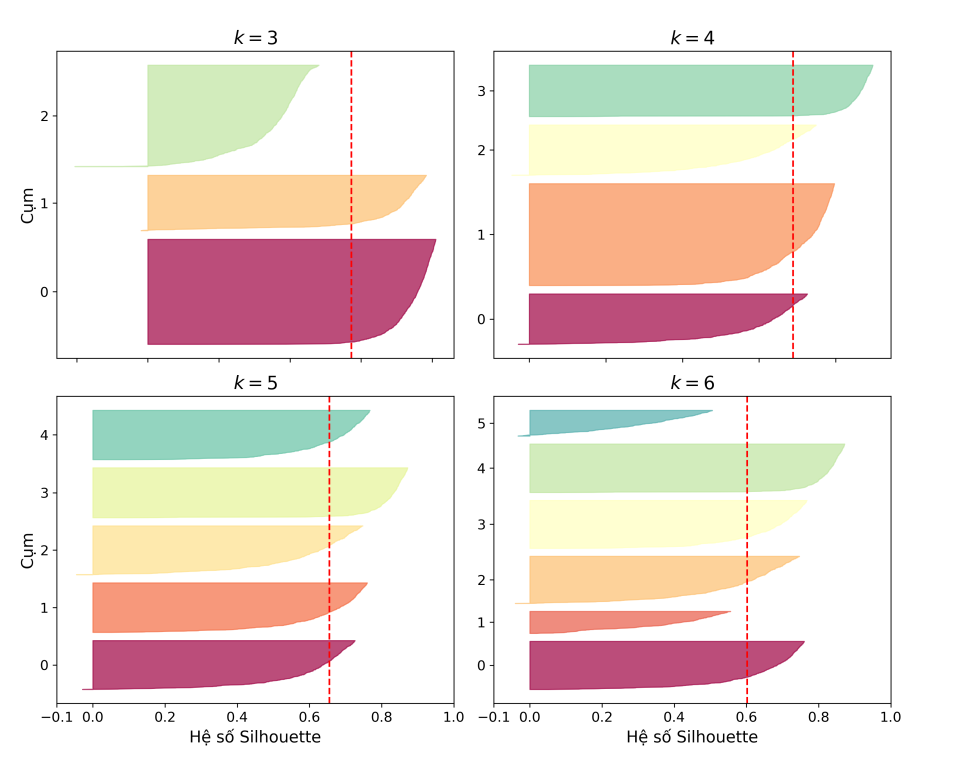\
    Như hình trên, khi hầu hết các mẫu trong một cụm có hệ số thấp hơn điểm số silhoutte trung bình\
    thì số lượng cụm đó sẽ được coi là không tốt vì nằm quá gần các cụm khác. Có thể thấy k = 3,6 là\
    các cụm không tốt. Ngược lại k = 5 lại tốt hơn k = 4 cũng như đây là cụm tốt nhất do các kích thước\
    các cụm là gần giống nhau mặc dù k = 4 lại có điểm tổng thể cao hơn

In [7]:
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [15]:
from display_network import *

mndata = MNIST("mnist\\")
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

ModuleNotFoundError: No module named 'display_network'

In [11]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')

# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))

# import scipy.misc
# scipy.misc.imsave('aa.png', image)
import imageio
imageio.imwrite('aa.png', image)

NameError: name 'kmeans' is not defined

In [ ]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

In [ ]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

In [ ]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

In [ ]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

img = mpimg.imread('girl3.jpg')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('on')
plt.show()

In [ ]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [ ]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

In [ ]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()